In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium import IFrame
import base64

In [9]:
#Section that creates the map
data3 = pd.DataFrame({
   'lat':[111,140, -95, -135, 122, 123, 126,-9, 78,5,123,-175,-67,-112],
   'lon':[12,36, 22, 53, 24, 23, 33,55, 10,57,30,60,5,24],
   'name':['Vietnam', 'Japan', 'Mexico', 'Canada', 'Taiwan', 
           'Taiwan','Korea','Scotland','India','Norway','China','Arctic','Venezuela','Mexico'],
   'value':[0.035,0.234,0.024,0.22,0.09,0.064,0.09,0.0085, 0.066,0.048,0.02,0.15,0.047,0.75]
})
data3
 
# Make an empty map
m3 = folium.Map(location=[20,0],
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}',
    attr='Tiles &copy; Esri &mdash; Source: Esri, DeLorme, NAVTEQ, USGS, Intermap, iPC, NRCAN, Esri Japan, METI, Esri China (Hong Kong), Esri (Thailand), TomTom, 2012',
    zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(data3)):
   folium.Circle(
      location=[data3.iloc[i]['lon'], data3.iloc[i]['lat']],
      popup=str(data3.iloc[i]['value'])+' ppm',
      radius=data3.iloc[i]['value']*1000000.0,
      color='salmon',
      fill=True,
      fill_color='salmon'
   ).add_to(m3)


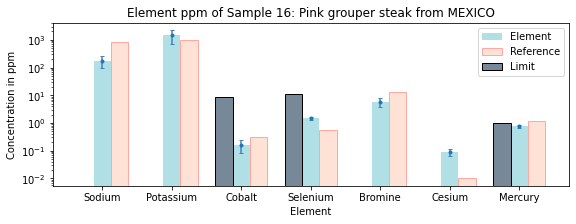

In [10]:
#Section that creates the first chart
#Pink Grouper
station = '42'
resolution, width, height = 75, 9.5, 5

elements = ['Sodium', 'Potassium', 'Cobalt', 'Selenium', 'Bromine',
           'Cesium', 'Mercury']

ppm = [176.69, 1473.66, 0.166, 1.51, 5.83, 0.09, 0.75]
x = np.linspace(1,len(ppm),len(ppm))
sys_unc = [80.61, 754.35, 0.084, 0.15, 1.92, 0.024, 0.093]
stat_unc = [4.79, 98.09, 0.022, 0.10, 0.21, 0.013, 0.023]
tot_unc = []
for i in x:
    val = (sys_unc[int(i)-1]**2+stat_unc[int(i)-1]**2)**0.5
    tot_unc.append(val)

mpl_fig = plt.figure(figsize=(9.25,3))
ax = mpl_fig.add_subplot(111)
w=0.25
p1 = ax.bar(x, ppm, w, color='powderblue', label='Element')

#reference values (based on averages)
ppm2 = [860, 1000, 0.3, 0.58, 13, 0.01, 1.205]

#regulatory limits for the elements
limits = [0, 0, 8.48, 11.3, 0, 0, 1]

#reference graph
p2 = ax.bar(x+0.25, ppm2, w, color='lightsalmon', edgecolor='red', alpha=0.3, label='Reference')
#error bars
p3 = plt.errorbar(x, ppm, yerr=tot_unc, fmt='.', ecolor='steelblue', capthick=1, capsize=2)
#limits graph
p4 = ax.bar(x-0.25, limits, w, color='lightslategray', edgecolor='k', label='Limit')

plt.xlabel('Element')
plt.ylabel('Concentration in ppm')
plt.title('Element ppm of Sample 16: Pink grouper steak from MEXICO')
plt.legend()
plt.xticks(x, elements)
ax.set_yscale('log')

png = 'mpld3_{}.png'.format(station)
#mpl_fig.savefig(png, dpi=resolution)

#encoded = base64.b64encode(open(png, 'rb').read()).decode()

encoded = base64.b64encode(open('html/pinkGrouper.jpeg', 'rb').read()).decode()


In [11]:
#Section that creates the first pop up
html="""
    <body style="border:3px; border-style:solid; border-color:navy; padding: 1em;">
    <center><h3>Pink Grouper </h3></center>
    <p style="float: left; padding: 1px 30px 1px 1px">
    <img src="data:image/jpeg;base64,{}" style="width:200px;height:100px;" alt="Mexico Concentrations">
    </p>
    <p style="padding: 1px 1px 10px 1px">
    <ul>
        <li><b>Location:</b>Mexico </li>
        <li><b>Average size:</b> 5.67 kg</li>
        <li><b>Concentration:</b> 0.75 ppm</li>
        <li><b>Limit:</b> 1 ppm</li>
    </ul>
    </p>
    <p>
        Although the mercury concentrations appears high in this region, the reason for the high concentration
        isn't due to geographical location but instead due to the species of fish. The other species located in the
        region is the Cardinal snapper, which has a much lower detected concentrstion. The difference between the 
        two fish is the size; while the snapper is about the length of a forearm, the grouper is about the size of 
        a human torso. Since mercury is a bioaccumulate (accumulates as a fish goes up in the food chain), it is 
        common to find high levels of mercury in larger fish species.
    </p>
    </body>
    """.format
iframe = IFrame(html(encoded), width=(width*resolution), height=(height*resolution))
popup = folium.Popup(iframe, max_width=2650)

folium.Marker([24,-112], popup=popup).add_to(m3)

m3.save('html/MercuryMap.html')

In [12]:
m3